In [1]:
!pip install nltk
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from google.colab import files

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
uploaded = files.upload()  # sections_sample_resume.json

Saving sections_sample_resume.json to sections_sample_resume.json


In [4]:
with open(list(uploaded.keys())[0], 'r') as f:
    sections = json.load(f)

print("Sections found:", list(sections.keys()))

Sections found: ['experience', 'skills', 'education']


In [5]:
flat_text = []
for section_name, lines in sections.items():
    flat_text.append(f"--- {section_name.upper()} ---")
    flat_text.extend(lines)

full_resume_text = "\n".join(flat_text)
print(full_resume_text[:500])

--- EXPERIENCE ---
Business Account Lead
February 2014 Company Name - City , State
As a Business Account Lead managed both the client relationship for the outsourcing contract and client service management and delivery
against the contract.
Activities include managing the P&L of the account, managing the teams, implementing and improving standard processes and tools to drive
operational efficiencies, and meeting operational and financial commitments.
Developed and managed the outsourcing deliver


In [7]:
# Meslekler için kullandığımız pipeline
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

synonyms = {
    'dev': 'developer',
    'sr': 'senior',
    'jr': 'junior'
}

def clean_resume(text):
    text = text.lower().strip()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    tokens = [synonyms.get(t, t) for t in tokens]
    return ' '.join(tokens)

In [10]:
cleaned_resume = clean_resume(full_resume_text)

## Kontrol amaçlı:

In [11]:
print("=== Cleaned Resume Snippet ===")
print(cleaned_resume[:500], "\n")

=== Cleaned Resume Snippet ===
experience business account lead february 2014 company name city state business account lead managed client relationship outsourcing contract client service management delivery contract activity include managing account managing team implementing improving standard process tool drive operational efficiency meeting operational financial commitment developed managed outsourcing delivery contract relationship including transition service delivery ensure smooth efficient way ensuring minimal escalat 



In [12]:
tokens = cleaned_resume.split()
print("Total tokens:", len(tokens))
print("Unique tokens:", len(set(tokens)), "\n")

Total tokens: 1224
Unique tokens: 546 



In [13]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

freq = Counter(tokens)
top10 = freq.most_common(10)
df_top10 = pd.DataFrame(top10, columns=["token","count"])
print("=== Top 10 Tokens ===")
display(df_top10)

=== Top 10 Tokens ===


,token,count
0,team,38
1,process,34
2,client,25
3,delivery,20
4,service,19
5,management,15
6,key,12
7,performance,12
8,business,11
9,managing,11


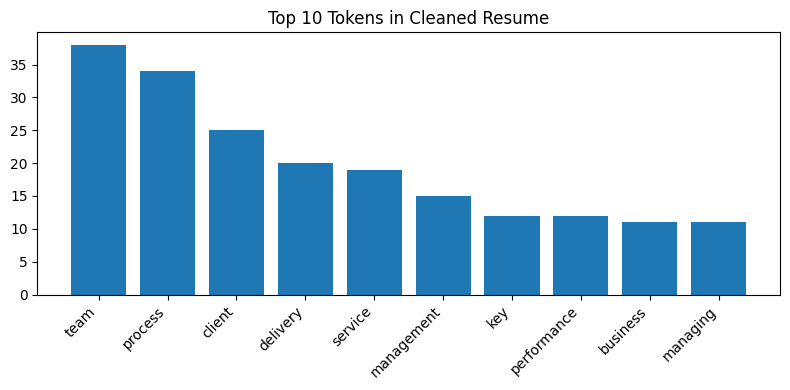

In [14]:
plt.figure(figsize=(8,4))
plt.bar(df_top10["token"], df_top10["count"])
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Tokens in Cleaned Resume")
plt.tight_layout()
plt.show()

In [15]:
with open('cleaned_resume.txt', 'w') as f:
    f.write(cleaned_resume)
print("Saved cleaned_resume.txt")

Saved cleaned_resume.txt
